In [1]:
!pip install pandas

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
pisa_df = pd.read_csv("PISA_SCORES_xl_clean.csv")
pisa_df.head()

,COUNTRY_NAME,READING_AVG,MATH_AVG,SCIENCE_AVG,ID
0,OECD average,487.0,489.0,489.0,NaN
1,B-S-J-Z (China),555.0,591.0,590.0,CHN-BSJZ
2,Singapore,549.0,569.0,551.0,SGP
3,Macao (China),525.0,558.0,544.0,CHN-MO
4,Hong Kong (China),524.0,551.0,517.0,CHN-HKG


In [5]:
salaryRatio_df = pd.read_csv("salaryRatio_by_exp_clean.csv")
salaryRatio_df.head()

,COUNTRY_NAME,LS_15yrexp_to_perCapGDP,US_15yrexp_to_perCapGDP,LS_topscale_to_start,US_topscale_to_start,yrs_start_to_topSalary,ID
0,OECD,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,1.206361,1.206361,1.425063,1.425128,7.0,AUS
2,Austria,0.975104,1.067809,1.942419,2.067747,34.0,AUT
3,Belgium (Fl.),1.032397,1.032397,1.727457,1.727457,27.0,BEL-FL
4,Belgium (Fr.),0.999304,1.121943,1.722669,1.620292,27.0,BEL-FR


In [6]:
pisa_salary_ratio = pisa_df.merge(salaryRatio_df,how="inner")
pisa_salary_ratio.head()

,COUNTRY_NAME,READING_AVG,MATH_AVG,SCIENCE_AVG,ID,LS_15yrexp_to_perCapGDP,US_15yrexp_to_perCapGDP,LS_topscale_to_start,US_topscale_to_start,yrs_start_to_topSalary
0,B-S-J-Z (China),555.0,591.0,590.0,CHN-BSJZ,NaN,NaN,NaN,NaN,NaN
1,Singapore,549.0,569.0,551.0,SGP,1.119503,1.119503,3.013998,3.013998,NaN
2,Macao (China),525.0,558.0,544.0,CHN-MO,1.144100,1.144100,1.853916,1.853916,33.0
3,Hong Kong (China),524.0,551.0,517.0,CHN-HKG,NaN,NaN,NaN,NaN,NaN
4,Estonia,523.0,523.0,530.0,USSR-EST,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

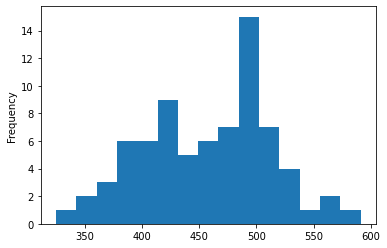

In [17]:
pisa_salary_ratio.MATH_AVG.plot.hist(bins = 15)

Distribution of `MATH_AVG` appears to be bimodal. 


<AxesSubplot:ylabel='Frequency'>

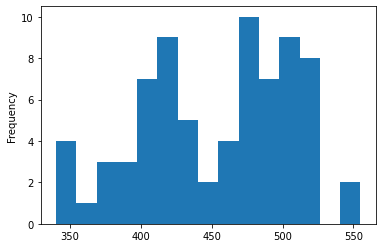

In [18]:
pisa_salary_ratio.READING_AVG.plot.hist(bins = 15)



<AxesSubplot:ylabel='Frequency'>

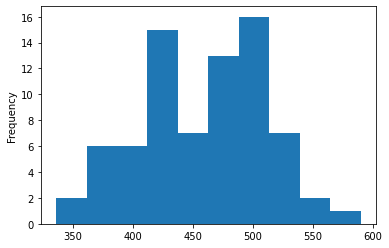

In [12]:
pisa_salary_ratio.SCIENCE_AVG.plot.hist()


Bivariate 

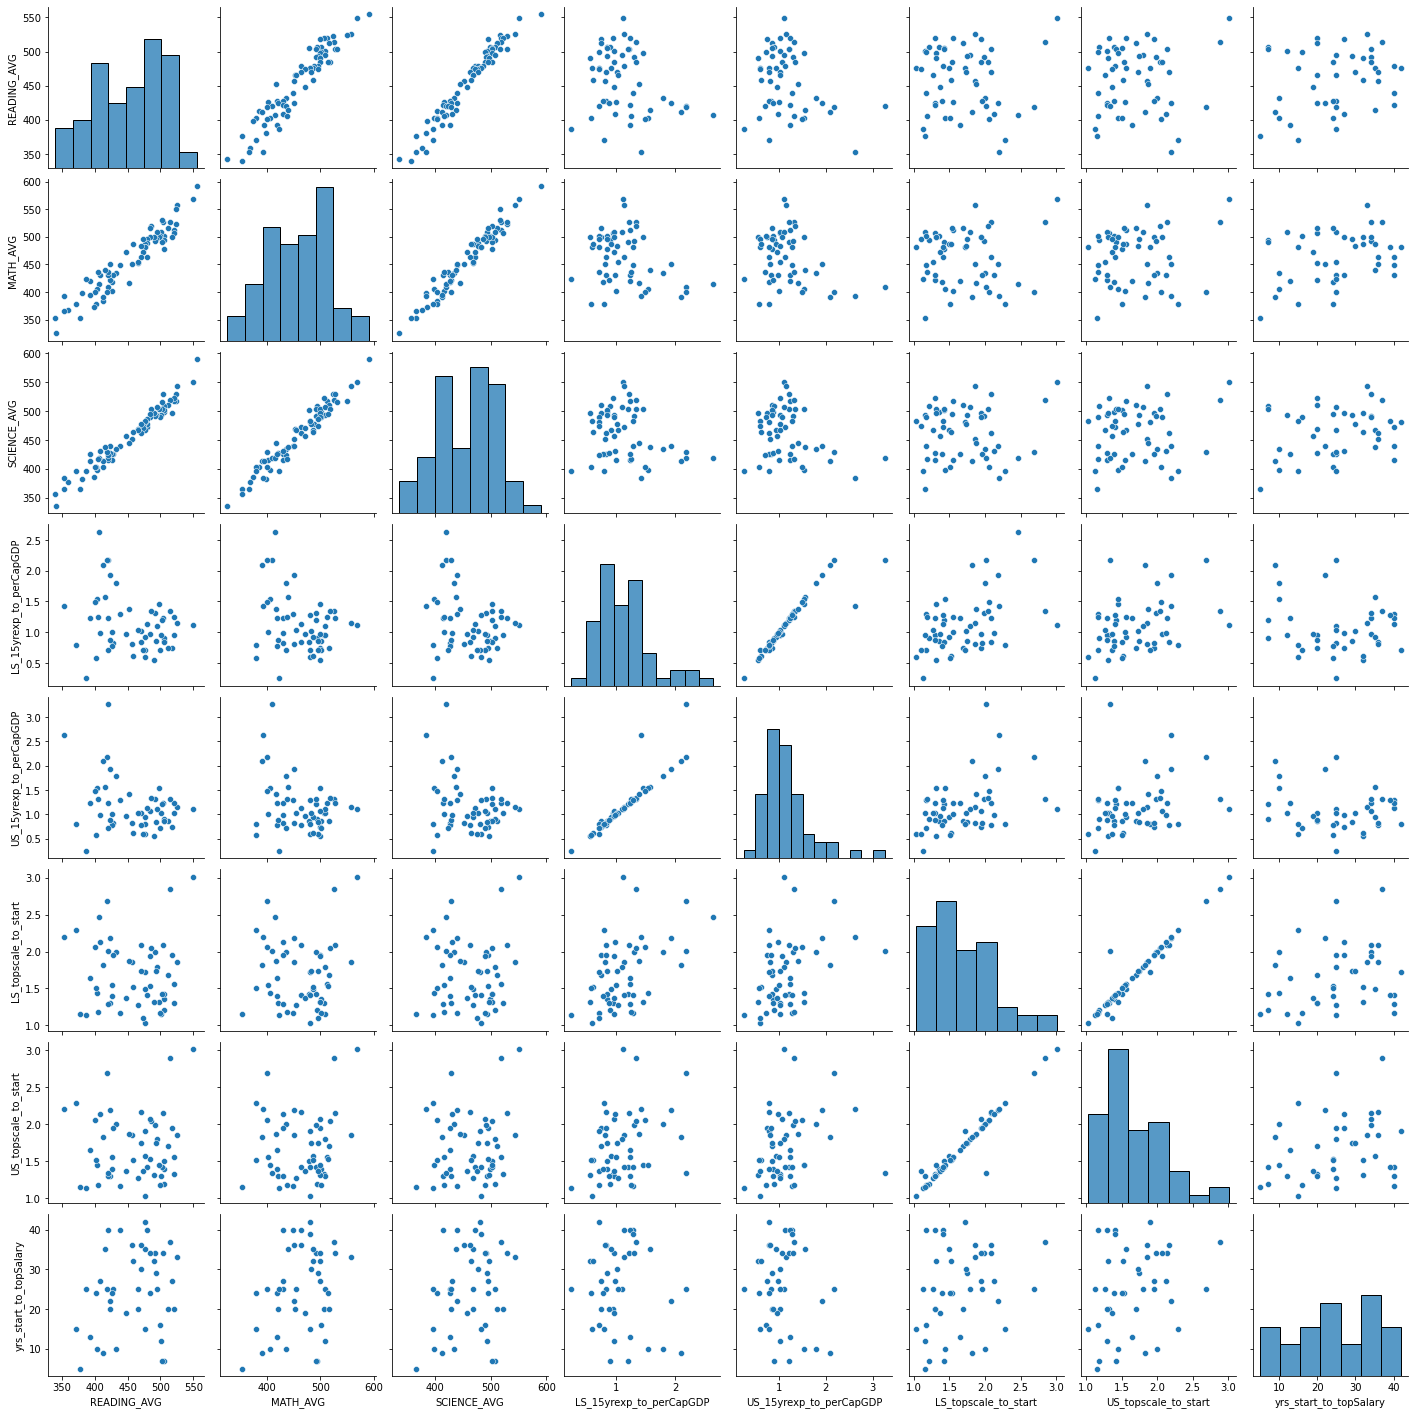

In [19]:
sns.pairplot(pisa_salary_ratio)
plt.show()

In [20]:
df_cleaned = pisa_salary_ratio.dropna(axis=0)
df_cleaned.shape

(40, 10)

In [ ]:
df_cleaned.head(10)

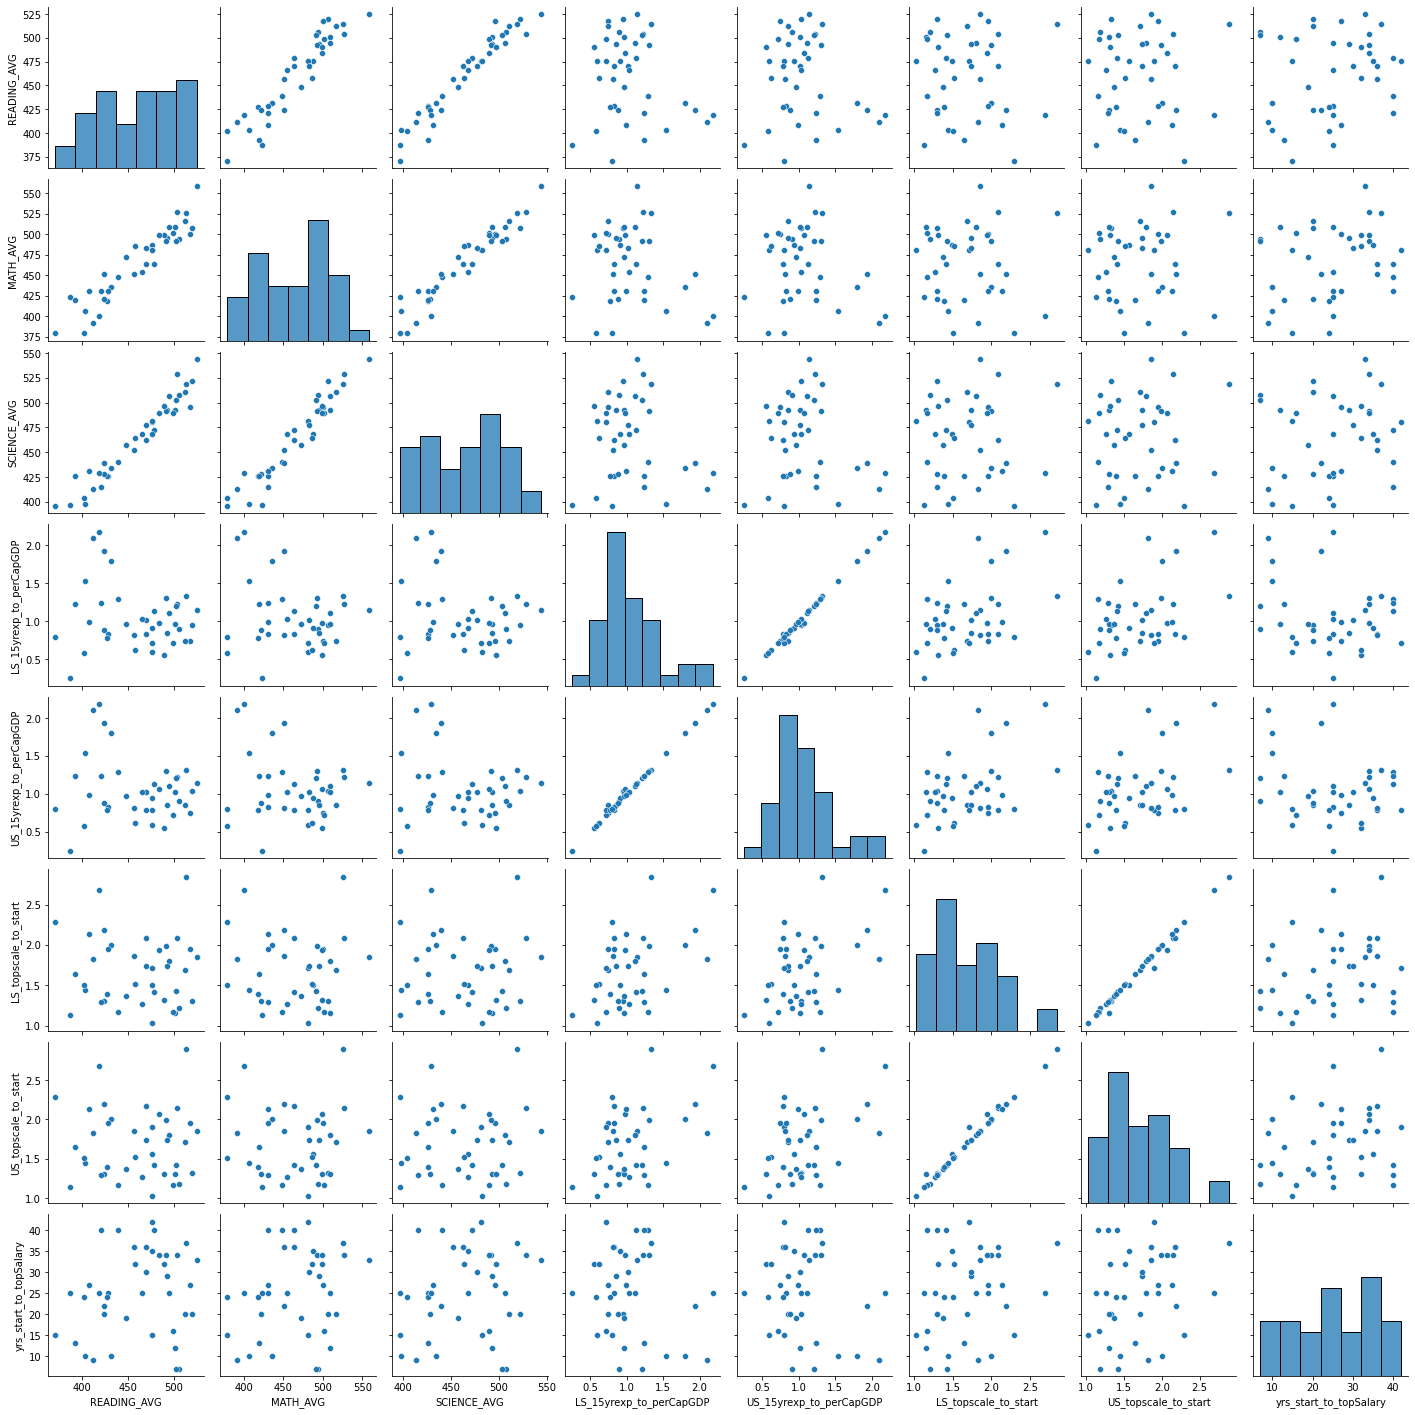

In [22]:
sns.pairplot(df_cleaned)
plt.show()

,READING_AVG,MATH_AVG,SCIENCE_AVG,LS_15yrexp_to_perCapGDP,US_15yrexp_to_perCapGDP,LS_topscale_to_start,US_topscale_to_start,yrs_start_to_topSalary
READING_AVG,1.000000,0.936951,0.968194,-0.176168,-0.155728,-0.051432,-0.023493,0.198690
MATH_AVG,0.936951,1.000000,0.958537,-0.218073,-0.198454,-0.034176,-0.003656,0.257955
SCIENCE_AVG,0.968194,0.958537,1.000000,-0.148562,-0.128166,0.023070,0.048429,0.185845
LS_15yrexp_to_perCapGDP,-0.176168,-0.218073,-0.148562,1.000000,0.997327,0.469072,0.449280,-0.184154
US_15yrexp_to_perCapGDP,-0.155728,-0.198454,-0.128166,0.997327,1.000000,0.460956,0.445341,-0.187738
LS_topscale_to_start,-0.051432,-0.034176,0.023070,0.469072,0.460956,1.000000,0.994768,0.219011
US_topscale_to_start,-0.023493,-0.003656,0.048429,0.449280,0.445341,0.994768,1.000000,0.246433
yrs_start_to_topSalary,0.198690,0.257955,0.185845,-0.184154,-0.187738,0.219011,0.246433,1.000000


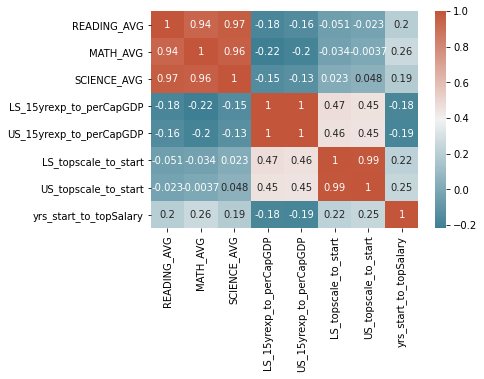

In [28]:
corrs = df_cleaned.corr(method ='pearson')
sns.heatmap(corrs, xticklabels=corrs.columns, yticklabels=corrs.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
corrs